In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

In [2]:
#Collecting and loading importing data using pandas
import pandas as pd 

#load data 
df= pd.read_csv('/Users/mehreetsinghbajaj/Documents/Projects MMM/GC Project/Sample dataset/bike_sales_data.csv' )

#Show first 5 rows 
df.head()

,Week,sales,branded_search_spend,nonbranded_search_spend,facebook_spend,print_spend,ooh_spend,tv_spend,radio_spend
0,7/23/17,58850.0,1528.8,463.32,802.620,0,0,0,0
1,7/30/17,62050.0,1575.6,468.00,819.312,0,0,0,0
2,8/6/17,59388.0,1544.4,477.36,749.034,0,0,0,0
3,8/13/17,56964.0,1528.8,468.00,741.468,0,0,0,0
4,8/20/17,53460.0,1560.0,458.64,811.200,0,0,0,0


In [3]:
#Check the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Week                     260 non-null    object 
 1   sales                    260 non-null    float64
 2   branded_search_spend     260 non-null    float64
 3   nonbranded_search_spend  260 non-null    float64
 4   facebook_spend           260 non-null    float64
 5   print_spend              260 non-null    int64  
 6   ooh_spend                260 non-null    int64  
 7   tv_spend                 260 non-null    int64  
 8   radio_spend              260 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 18.4+ KB


In [4]:
#Summary stats
df.describe()

,sales,branded_search_spend,nonbranded_search_spend,facebook_spend,print_spend,ooh_spend,tv_spend,radio_spend
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,68107.553558,2033.680231,402.383740,1015.262797,376.923077,188.461538,278.846154,523.076923
std,19608.831323,902.962242,200.049791,453.045170,487.533935,391.834536,788.512244,1033.906896
min,29088.000000,1375.920000,229.320000,660.231000,0.000000,0.000000,0.000000,0.000000
25%,54405.000000,1556.100000,238.680000,772.044000,0.000000,0.000000,0.000000,0.000000
50%,64442.070000,1606.800000,351.000000,827.190000,0.000000,0.000000,0.000000,0.000000
75%,83872.112000,1928.160000,478.378000,997.542000,500.000000,0.000000,0.000000,0.000000
max,113762.880000,7800.000000,1093.693000,3900.000000,1500.000000,1000.000000,2500.000000,3000.000000


In [7]:
print(df.columns)


Index(['Week', 'sales', 'branded_search_spend', 'nonbranded_search_spend',
       'facebook_spend', 'print_spend', 'ooh_spend', 'tv_spend',
       'radio_spend'],
      dtype='object')


In [8]:
#Week to datetime 
df['Week'] = pd.to_datetime(df['Week'])


In [9]:
df['Week'].head()

0   2017-07-23
1   2017-07-30
2   2017-08-06
3   2017-08-13
4   2017-08-20
Name: Week, dtype: datetime64[ns]

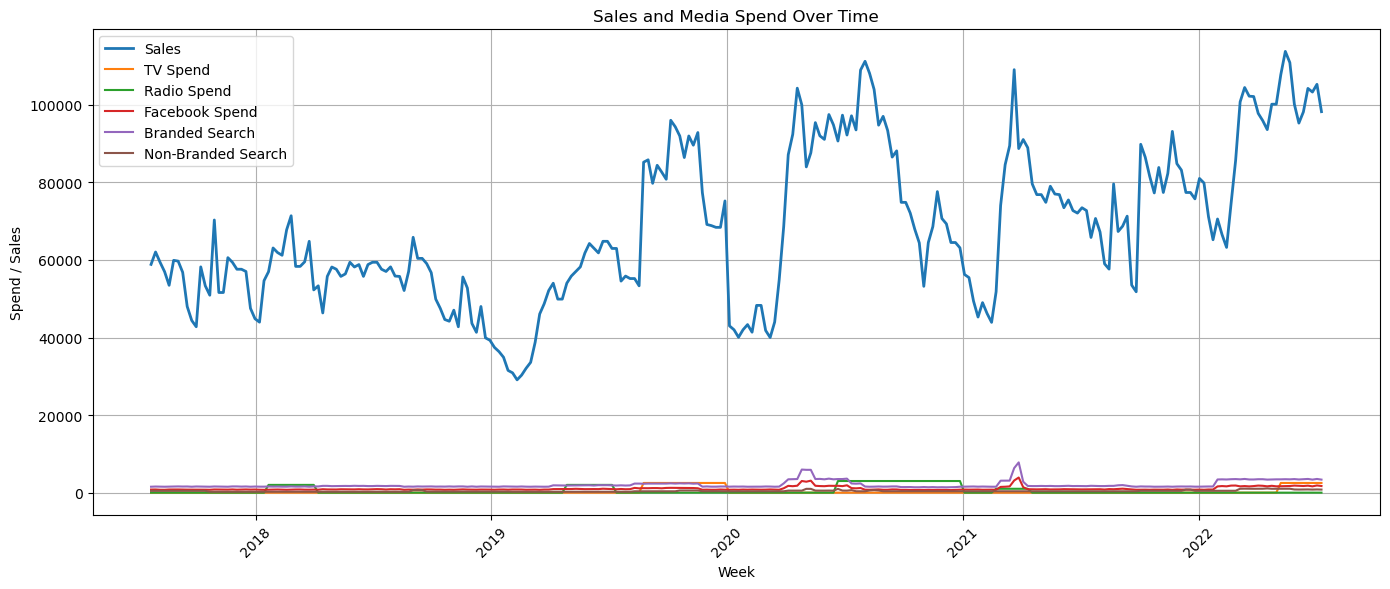

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['Week'], df['sales'], label='Sales', linewidth=2)
plt.plot(df['Week'], df['tv_spend'], label='TV Spend')
plt.plot(df['Week'], df['radio_spend'], label='Radio Spend')
plt.plot(df['Week'], df['facebook_spend'], label='Facebook Spend')
plt.plot(df['Week'], df['branded_search_spend'], label='Branded Search')
plt.plot(df['Week'], df['nonbranded_search_spend'], label='Non-Branded Search')
plt.legend()
plt.title("Sales and Media Spend Over Time")
plt.xlabel("Week")
plt.ylabel("Spend / Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
'''
📊 WHAT YOUR PLOT SHOWS (AND WHY IT’S CRUCIAL IN MMM)
🔷 The Blue Line = Sales
This is your target variable, the thing you’re trying to model and optimize.

Here’s what we see:

Sales are seasonal, with spikes around late Q4 and early Q1 — likely holiday or promotion-driven

There are sharp drops, possibly during pandemic lockdowns (2020 dip) — useful to note for outlier flags

Post-2021, there’s a growth trend — maybe due to media or market rebound

🟥 Other Lines = Media Spend (TV, Radio, Facebook, etc.)
They’re lower in scale compared to sales, so they look squashed. Still important insights:

Spend patterns are sporadic — certain channels (like branded_search) spike briefly
→ Could be short bursts or promo campaigns

Media seems to spike before or during sales peaks
→ That’s a clear sign of lag effect, which we’ll model using Adstock

Facebook & search have more frequent movement
→ Suggests always-on campaigns or lower-funnel tactics

🧠 How to Interpret This (Fox Interview Style):
“We started by visualizing weekly sales against multichannel spend. The plot revealed seasonality in sales, media bursts around promotional periods, and channel-specific behaviors — like branded search spikes. I noticed potential lag between spend and response, particularly for Facebook and TV, which led us to apply adstock transformations in the regression stage.”

'''

In [ ]:
'''  HERE'S WHY THAT'S HAPPENING:
Sales are in the hundred-thousands

Media spend (TV, Facebook, etc.) is in the hundreds or low thousands

So media lines look like they're glued to the floor

Also:

Matplotlib auto-scales x-axis ticks by year because you have 5+ years of weekly data

So short bursts (1–4 weeks of spend) get crushed in a compressed view

'''

In [11]:
df_plot = df.copy()
spend_cols = ['tv_spend', 'radio_spend', 'facebook_spend', 'branded_search_spend', 'nonbranded_search_spend']

for col in spend_cols:
    df_plot[col] = df_plot[col] / df_plot[col].max() * df['sales'].max()


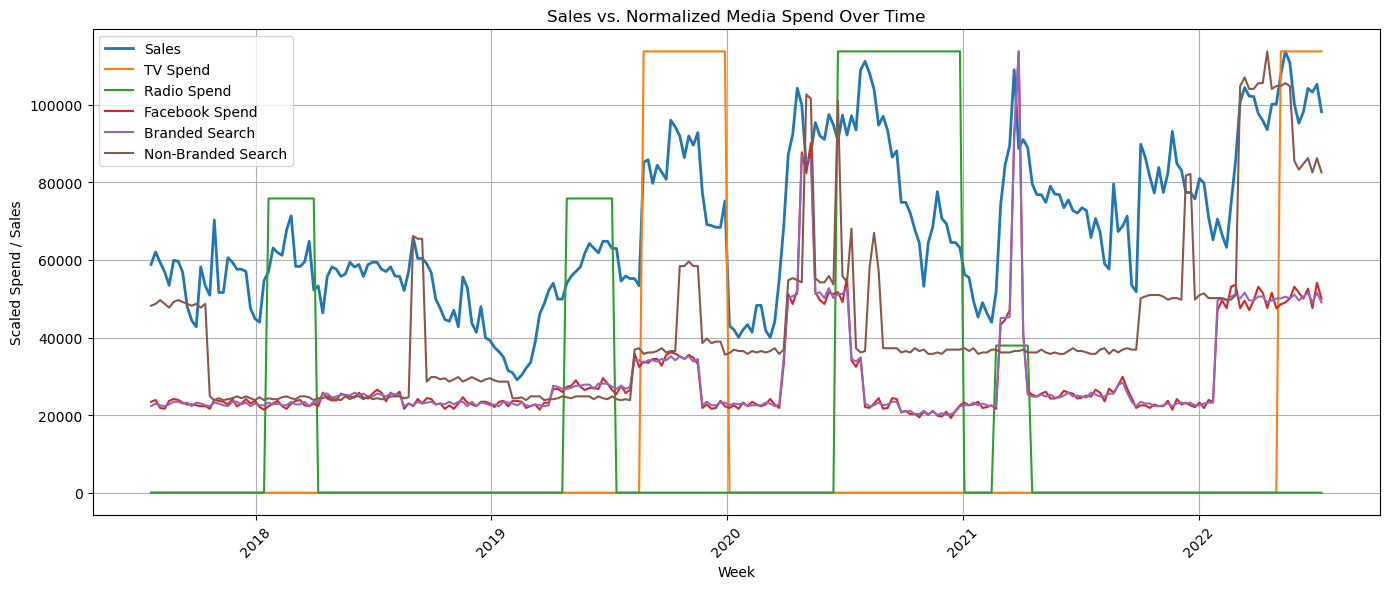

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(df_plot['Week'], df_plot['sales'], label='Sales', linewidth=2)
plt.plot(df_plot['Week'], df_plot['tv_spend'], label='TV Spend')
plt.plot(df_plot['Week'], df_plot['radio_spend'], label='Radio Spend')
plt.plot(df_plot['Week'], df_plot['facebook_spend'], label='Facebook Spend')
plt.plot(df_plot['Week'], df_plot['branded_search_spend'], label='Branded Search')
plt.plot(df_plot['Week'], df_plot['nonbranded_search_spend'], label='Non-Branded Search')
plt.legend()
plt.title("Sales vs. Normalized Media Spend Over Time")
plt.xlabel("Week")
plt.ylabel("Scaled Spend / Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
'''🎯 WHY ADSTOCK?
When you spend on TV, radio, or Facebook, people don’t buy immediately. They:

Watch an ad

Remember it

Maybe buy next week

This delayed, decaying effect is what adstock models.
It gives your MMM model memory.

'''

In [14]:
#Define the adstock function in python 
def apply_adstock(series, decay):
    adstocked = []
    prev = 0
    for value in series:
        current = value + decay * prev
        adstocked.append(current)
        prev = current
    return adstocked


In [71]:
'''🧠 What This Does:
Takes a channel’s weekly spend (e.g. Facebook)

Applies a carryover effect using a decay factor (e.g. 0.5)

Returns a new series where spend this week is influenced by last week’s

'''

'🧠 What This Does:\nTakes a channel’s weekly spend (e.g. Facebook)\n\nApplies a carryover effect using a decay factor (e.g. 0.5)\n\nReturns a new series where spend this week is influenced by last week’s\n\n'

In [15]:
decay_rate = 0.5

df_adstock = df.copy()
df_adstock['tv_adstock'] = apply_adstock(df['tv_spend'], decay=decay_rate)
df_adstock['radio_adstock'] = apply_adstock(df['radio_spend'], decay=decay_rate)
df_adstock['facebook_adstock'] = apply_adstock(df['facebook_spend'], decay=decay_rate)
df_adstock['branded_search_adstock'] = apply_adstock(df['branded_search_spend'], decay=decay_rate)
df_adstock['nonbranded_search_adstock'] = apply_adstock(df['nonbranded_search_spend'], decay=decay_rate)


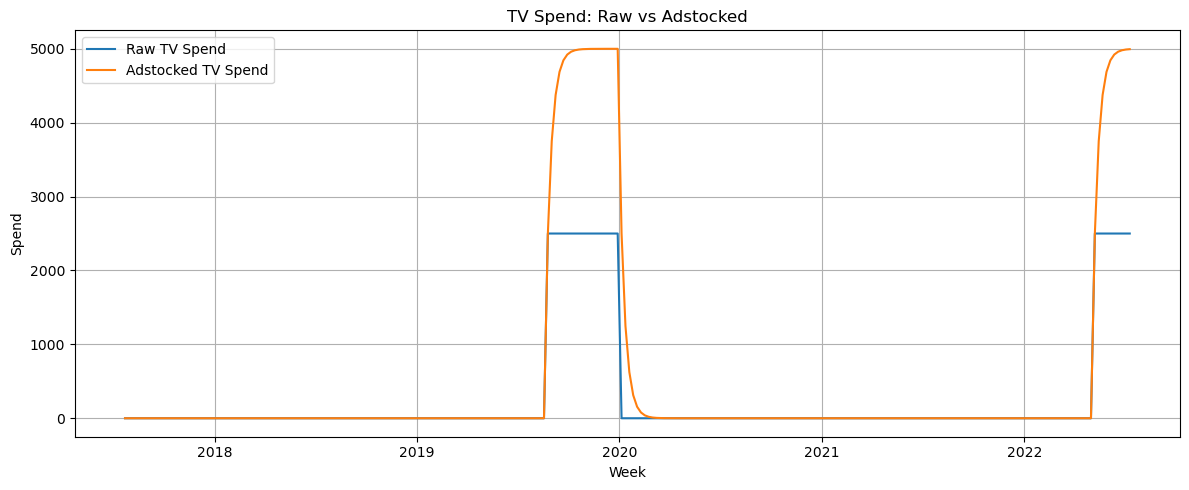

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(df['Week'], df['tv_spend'], label='Raw TV Spend')
plt.plot(df['Week'], df_adstock['tv_adstock'], label='Adstocked TV Spend')
plt.title('TV Spend: Raw vs Adstocked')
plt.xlabel('Week')
plt.ylabel('Spend')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
'''The blue spikes are when money was spent on TV

The orange curve is how people still feel or remember those ads for the next few weeks

It shows the residual effect of past marketing

'''

In [ ]:
#Lets build i the regression model 
'''
Let’s go regression. 💥

You’ve done everything right: cleaned data, applied adstock, visualized — now it’s time to build the model that tells you what’s actually driving sales.

'''


In [17]:
#importing regression modules
import statsmodels.api as sm


In [18]:
#Lets define feature x and y

X = df_adstock[['tv_adstock', 'radio_adstock', 'facebook_adstock',
                'branded_search_adstock', 'nonbranded_search_adstock']]
y = df_adstock['sales']


In [19]:
#Add intercept Term 

X = sm.add_constant(X)


In [20]:
#Fit the OLS regression model 

model = sm.OLS(y, X).fit()


In [21]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     101.8
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.34e-58
Time:                        12:30:23   Log-Likelihood:                -2795.2
No. Observations:                 260   AIC:                             5602.
Df Residuals:                     254   BIC:                             5624.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
'''
📈 WHAT IS OLS REGRESSION?
OLS = Ordinary Least Squares

OLS is the most basic form of regression. It builds a line (or equation) that best fits your data — in your case, sales vs. media spend.

It’s trying to answer:
"How much do changes in media spend (TV, Facebook, etc.) explain the change in sales?"

OLS draws the best-fitting line through your data by minimizing the squared distance between actual and predicted sales.
That’s the “least squares” part

🧠 THE FORMULA:
Sales = β₀ + β₁ * TV + β₂ * Facebook + β₃ * Radio + ... + error
β₀ (const) = baseline sales (intercept)

β₁, β₂, β₃... = how much 1 unit of spend affects sales

Error = the stuff your model couldn’t predict


✅ R-SQUARED: "How Good is the Model?"
What it is:
R-squared tells you what % of the variation in sales your model explains.

R² = 0.66 → 66% of sales behavior is explained by your media spend

The rest (34%) is due to untracked stuff (weather, promotions, holidays, etc.)



Rule of Thumb:
R² Value	Meaning
> 0.80	Very strong model (rare in marketing!)
0.60–0.79	Good model
< 0.50	Might be underfitting



📊 P-VALUE: "Is This Variable Real or Just Noise?"
Each variable (TV, Radio, etc.) gets a p-value.

It answers:

"Is this coefficient statistically significant, or could it just be randomness?"

Rule of Thumb:
P-Value	Meaning
< 0.05	✅ Statistically significant (we trust it)
0.05–0.10	Meh. Maybe something there
> 0.10	❌ Not significant (probably noise)

Each β (beta) is a coefficient.

🔎 What It Tells You:
➕ If the coef is positive:
"If I increase this variable by 1 unit, sales will go up by that many units."

➖ If the coef is negative:
"If I increase this variable, sales will drop."


📦 Example From Your Model:
Variable	Coef	Meaning
tv_adstock	2.68	Spend $1 more on TV → get $2.68 more in sales 💰
radio_adstock	3.09	$1 in radio brings $3.09 in sales
facebook_adstock	-3.22	🚫 Spend hurts sales (probably noise, not significant)
nonbranded_search_adstock	23.08	MASSIVE ROI channel, $1 → $23.08 in sales

 How to Say It in Interview:
“The coefficient represents the marginal contribution of each channel to sales. 
For example, our model showed that every $1 in adstocked TV spend drove roughly $2.68 



TL;DR — Think of OLS Like This:
"I want to understand what’s driving my business. I plug in media channels and get
back which ones work, 
how much they help, and which ones I should cut."in incremental sales — a strong ROI signal.”

OLS tries to:

Minimize the total squared length of all these gray lines
That’s why it’s called Ordinary Least Squares.
'''





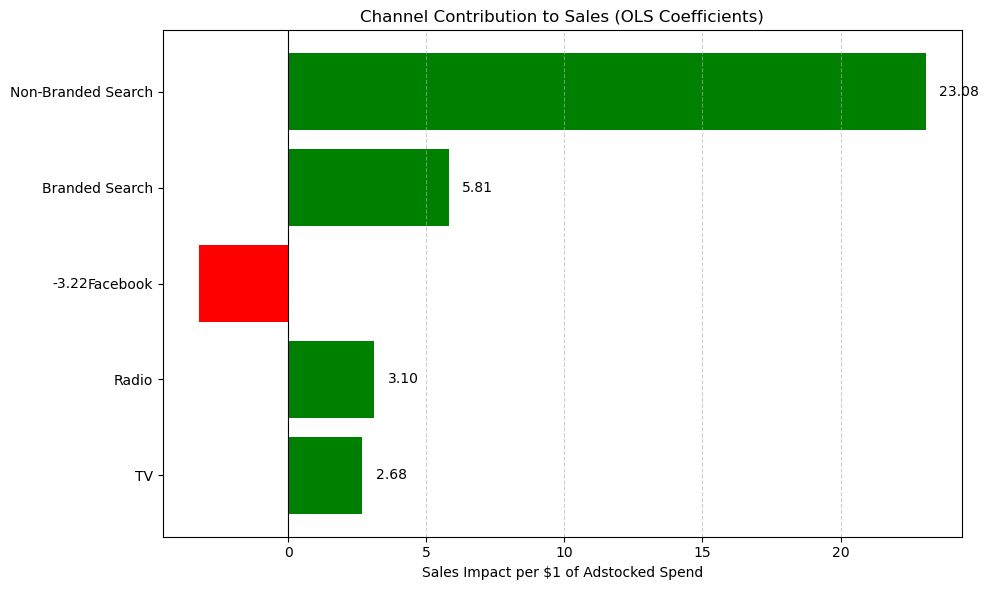

In [22]:
import matplotlib.pyplot as plt

# Channel names and their regression coefficients
channels = ['TV', 'Radio', 'Facebook', 'Branded Search', 'Non-Branded Search']
coefficients = [2.68, 3.10, -3.22, 5.81, 23.08]

# Set color: green for positive impact, red for negative
colors = ['green' if coef > 0 else 'red' for coef in coefficients]

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(channels, coefficients, color=colors)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Channel Contribution to Sales (OLS Coefficients)")
plt.xlabel("Sales Impact per $1 of Adstocked Spend")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Label each bar with the coefficient value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5 if width > 0 else width - 4,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}',
             va='center',
             ha='left' if width > 0 else 'right')

plt.tight_layout()
plt.show()


In [82]:
'''🧠 What You’ll See:
A beautiful bar chart showing:

Which channels are helping or hurting sales

The magnitude of their effect per $1 spent'''

'🧠 What You’ll See:\nA beautiful bar chart showing:\n\nWhich channels are helping or hurting sales\n\nThe magnitude of their effect per $1 spent'

In [ ]:
'''

📊 What Is ROI in MMM?
ROI = Return / Investment

In our case:

ROI = Incremental Revenue from Channel / Channel Spend

We’ll use:

Coefficient = incremental revenue per $1 spent

Total Spend = sum of that channel's adstocked spend

Incremental Revenue = coefficient × total spend



In [23]:
# Channel coefficients (from your model)
coeffs = {
    'tv_adstock': 2.68,
    'radio_adstock': 3.10,
    'facebook_adstock': -3.22,
    'branded_search_adstock': 5.81,
    'nonbranded_search_adstock': 23.08
}


In [84]:
'''🧠 This is your regression model’s output:

Each value says how much additional sales you got per $1 spent on that channel

We're going to use this to estimate total revenue driven by each channel '''

"🧠 This is your regression model’s output:\n\nEach value says how much additional sales you got per $1 spent on that channel\n\nWe're going to use this to estimate total revenue driven by each channel "

In [24]:
roi_results = []


In [86]:
''' 
🧠 We’ll fill this list with one dictionary per channel — each dictionary will contain:

Channel name

Total spend

Revenue generated

ROI

'''

' \n🧠 We’ll fill this list with one dictionary per channel — each dictionary will contain:\n\nChannel name\n\nTotal spend\n\nRevenue generated\n\nROI\n\n'

In [25]:
# Lets work on the whole block of function 

for channel, coef in coeffs.items():
    spend = df_adstock[channel].sum()
    revenue = coef * spend
    roi = revenue / spend if spend != 0 else 0


In [ ]:
'''
This loop is going through each media channel and calculating 
its ROI using your regression model’s coefficient.'''

In [ ]:
'''

🔁 for channel, coef in coeffs.items():
coeffs is a dictionary:

python
Copy
Edit
{
    'tv_adstock': 2.68,
    'radio_adstock': 3.10,
    ...
}
.items() gives you each key-value pair

channel → 'tv_adstock', 'facebook_adstock', etc.

coef → 2.68, -3.22, etc.

🔄 So this loop runs once for each channel.

💰 spend = df_adstock[channel].sum()
This calculates the total adstocked spend for that channel:

df_adstock[channel] is a column like tv_adstock

.sum() adds up all weekly values

📌 This gives you the total amount of TV exposure, accounting for carryover effect (adstock)

💵 revenue = coef * spend
You’re using the regression coefficient to estimate the total incremental revenue:

E.g., if tv_adstock coef is 2.68, and the total spend was $100,000:

python
Copy
Edit
revenue = 2.68 * 100000 = $268,000
📌 This is how much incremental sales came from that channel based on your model.

📈 roi = revenue / spend if spend != 0 else 0
Basic ROI formula:

ROI = Revenue / Spend

This line:

Safely handles cases where spend = 0 (to avoid divide-by-zero error)

If spend was $100,000, and revenue was $268,000, ROI = 2.68

If spend = 0, it just sets ROI = 0

'''

In [26]:
    roi_results.append({
        'Channel': channel.replace('_adstock', '').replace('_', ' ').title(),
        'Total Spend ($)': round(spend, 2),
        'Revenue Generated ($)': round(revenue, 2),
        'ROI (Return per $1)': round(roi, 2)
    })


In [89]:
'''

🧠 This:

Cleans up the channel name to look nice

Rounds all numbers to 2 decimal places

Adds that channel’s ROI info to the roi_results list

'''


'\n\n🧠 This:\n\nCleans up the channel name to look nice\n\nRounds all numbers to 2 decimal places\n\nAdds that channel’s ROI info to the roi_results list\n\n'

In [ ]:
'''
✅ STEP 1: Convert to a DataFrame
This takes the roi_results list of dictionaries and turns it into a clean, readable table.'''

In [27]:
import pandas as pd

roi_df = pd.DataFrame(roi_results)


In [95]:
'''
✅ STEP 2: Display It in Jupyter Notebook
Simply run:
'''

'\n✅ STEP 2: Display It in Jupyter Notebook\nSimply run:\n'

In [28]:
roi_df


,Channel,Total Spend ($),Revenue Generated ($),ROI (Return per $1)
0,Nonbranded Search,207624.66,4791977.09,23.08


In [29]:
import pandas as pd

# Your full regression coefficients
coeffs = {
    'tv_adstock': 2.68,
    'radio_adstock': 3.10,
    'facebook_adstock': -3.22,
    'branded_search_adstock': 5.81,
    'nonbranded_search_adstock': 23.08
}

# Make sure df_adstock exists (use this line only if your data already exists in df_adstock)
# Otherwise, load it or define it again before this block

# ROI calculation
roi_results = []

for channel, coef in coeffs.items():
    if channel in df_adstock.columns:
        spend = df_adstock[channel].sum()
        revenue = coef * spend
        roi = revenue / spend if spend != 0 else 0
        roi_results.append({
            'Channel': channel.replace('_adstock', '').replace('_', ' ').title(),
            'Total Spend ($)': round(spend, 2),
            'Revenue Generated ($)': round(revenue, 2),
            'ROI (Return per $1)': round(roi, 2)
        })
    else:
        print(f"⚠️ Warning: {channel} not found in df_adstock columns")

# Create DataFrame
roi_df = pd.DataFrame(roi_results)

# Display in notebook
roi_df


,Channel,Total Spend ($),Revenue Generated ($),ROI (Return per $1)
0,Tv,140004.88,375213.09,2.68
1,Radio,272000.00,843200.00,3.10
2,Facebook,524442.85,-1688705.98,-3.22
3,Branded Search,1050668.92,6104386.42,5.81
4,Nonbranded Search,207624.66,4791977.09,23.08


In [31]:
 #First, import required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Subset only the features (exclude target)
X_features = df_adstock[['tv_adstock', 'radio_adstock', 'facebook_adstock', 
                         'branded_search_adstock', 'nonbranded_search_adstock']]

# Calculate correlation matrix
print("🔍 Correlation Matrix:")
print(X_features.corr())

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_features.columns
vif_data["VIF"] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]
vif_data

🔍 Correlation Matrix:
                           tv_adstock  radio_adstock  facebook_adstock  \
tv_adstock                   1.000000      -0.191827          0.231177   
radio_adstock               -0.191827       1.000000         -0.097244   
facebook_adstock             0.231177      -0.097244          1.000000   
branded_search_adstock       0.227781      -0.094248          0.998925   
nonbranded_search_adstock    0.313934      -0.126118          0.637629   

                           branded_search_adstock  nonbranded_search_adstock  
tv_adstock                               0.227781                   0.313934  
radio_adstock                           -0.094248                  -0.126118  
facebook_adstock                         0.998925                   0.637629  
branded_search_adstock                   1.000000                   0.638358  
nonbranded_search_adstock                0.638358                   1.000000  


,Feature,VIF
0,tv_adstock,1.287643
1,radio_adstock,1.243296
2,facebook_adstock,3318.996233
3,branded_search_adstock,3332.855849
4,nonbranded_search_adstock,9.055109


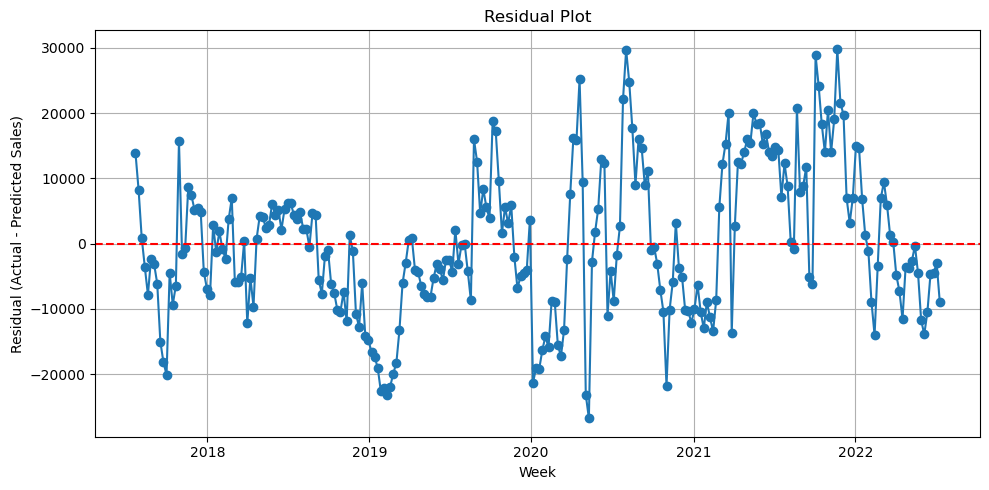

In [32]:
import statsmodels.api as sm

# Redefine model if needed
X = sm.add_constant(X_features)
y = df_adstock['sales']
model = sm.OLS(y, X).fit()

# Get predictions and residuals
df_adstock['prediction'] = model.predict(X)
df_adstock['residual'] = df_adstock['sales'] - df_adstock['prediction']

# Plot residuals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_adstock['Week'], df_adstock['residual'], marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Week')
plt.ylabel('Residual (Actual - Predicted Sales)')
plt.grid(True)
plt.tight_layout()
plt.show()


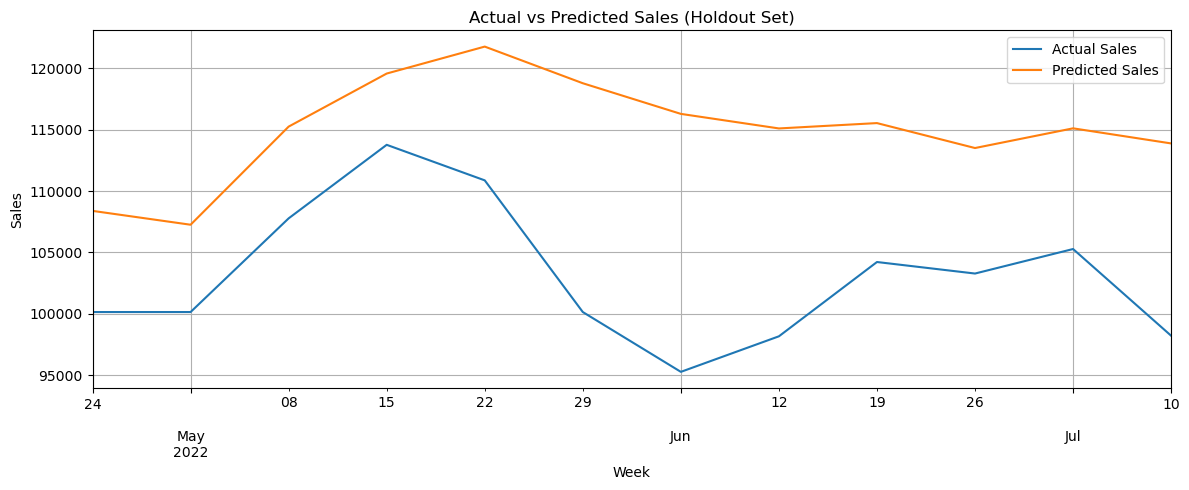

In [33]:
#Out of Sample Prediction

# Split data: train = all but last 12 weeks, test = last 12 weeks
train = df_adstock.iloc[:-12]
test = df_adstock.iloc[-12:]

X_train = sm.add_constant(train[X_features.columns])
y_train = train['sales']

X_test = sm.add_constant(test[X_features.columns])
y_test = test['sales']

# Refit model on training set
model_holdout = sm.OLS(y_train, X_train).fit()
y_pred = model_holdout.predict(X_test)

# Compare actual vs predicted
comparison = pd.DataFrame({
    'Week': test['Week'],
    'Actual Sales': y_test,
    'Predicted Sales': y_pred
})

comparison.set_index('Week').plot(figsize=(12, 5), title="Actual vs Predicted Sales (Holdout Set)")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# Calculating MAE and MAPE

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# STEP 1: Make predictions on the holdout (test) set
y_pred = model_holdout.predict(X_test)

# STEP 2: Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# STEP 3: Calculate MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Multiply by 100 to get %

# STEP 4: Print the results
print("Mean Absolute Error (MAE): $", round(mae, 2))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 2), "%")


Mean Absolute Error (MAE): $ 11921.69
Mean Absolute Percentage Error (MAPE): 11.76 %


In [ ]:
'''
🧠 What It Does:
mean_absolute_error() gives you the average amount your model is off from actual sales (in $)

mean_absolute_percentage_error() shows how wrong it is in % terms (so it works across different scales)'''